WeatherPY
Analysis Observations:
1. The warmest locations are within 20 degrees of the equator. This is observed in the peak of the temperature and lattitude plot where temperatures begin to decline after 20 degrees and -20 degrees. This can also be expected as the locations near the equator get more direct sunlight than other locations on the earth's surface.
2. Wind speed also has a slight increase as the distance from the equator increases. This can be observed in the Southern and Northern Hemisphere Regression charts, as you notice a slight rise in each regression lines the further the location is from the equator. There is variance in the windspeed, but the data appears to be clustered enought to reasonably conclude that latitude and wind speed are have some relationship. This also can be expected as the Coriolis effect has impact on ocean currents and wind and the Coriolis effect increases the further the location is from the equator.
3. Both humidity and cloudiness have scattered variance and do not demonstrate a relationship to latitude. As you can see in the respective regression plots the regression line does not center on a majority of the plots, but instead follows a few due to the variance and scatter of the data plots. This indicates that there is not a relationship between the plotted variables. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + cities[0]
response = requests.get(query).json()

#Verify data pull and observe data locations
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -0.6,
        "lon": 73.0833
    },
    "dt": 1635630320,
    "id": 1282256,
    "main": {
        "feels_like": 89.46,
        "grnd_level": 1009,
        "humidity": 75,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 82.85,
        "temp_max": 82.85,
        "temp_min": 82.85
    },
    "name": "Hithadhoo",
    "rain": {
        "1h": 1.33
    },
    "sys": {
        "country": "MV",
        "sunrise": 1635641231,
        "sunset": 1635684914
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 280,
        "gust": 22.55,
        "speed": 20.67
    }
}


In [9]:
#Establish Counter
counter = 0
#Establish Lists for the datapoints needed 
city = []
lat =[]
lng = []
temp = []
temp_max = []
hum = []
cloud = []
wind = []
country = []
date = []

#Loop through data and capture elements needed for analysis append to list when data is available
for x in cities:    
    try:
        query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + x
        response = requests.get(query).json()
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print("Index Number", counter)
        print(x, "added") 
        
        #Add one to counter
        counter = counter + 1
    
    except:
        print("Error found will skip")
    continue
        
print("END") 
 

Index Number 0
hithadhoo added
Error found will skip
Index Number 1
hilo added
Index Number 2
husavik added
Index Number 3
mataura added
Index Number 4
laguna added
Index Number 5
provideniya added
Index Number 6
nizhniy kuranakh added
Index Number 7
wagar added
Index Number 8
tukrah added
Index Number 9
mabaruma added
Index Number 10
bac lieu added
Index Number 11
saint-philippe added
Index Number 12
yanam added
Index Number 13
rikitea added
Index Number 14
baker city added
Index Number 15
ilulissat added
Index Number 16
kapaa added
Index Number 17
chiredzi added
Index Number 18
upernavik added
Index Number 19
petropavlovsk-kamchatskiy added
Index Number 20
svetlogorsk added
Index Number 21
puerto ayora added
Index Number 22
mayumba added
Index Number 23
carnarvon added
Index Number 24
marawi added
Index Number 25
dikson added
Index Number 26
yellowknife added
Index Number 27
kharp added
Index Number 28
clyde river added
Index Number 29
port elizabeth added
Index Number 30
new plymout

Index Number 242
khuzdar added
Index Number 243
sabha added
Error found will skip
Index Number 244
kodiak added
Error found will skip
Index Number 245
tatawin added
Index Number 246
port-cartier added
Index Number 247
vila franca do campo added
Index Number 248
iquique added
Index Number 249
thunder bay added
Index Number 250
khandyga added
Index Number 251
kholm added
Index Number 252
iqaluit added
Index Number 253
sosnovo-ozerskoye added
Error found will skip
Index Number 254
richards bay added
Index Number 255
airai added
Index Number 256
fray bentos added
Error found will skip
Index Number 257
ossora added
Index Number 258
qunduz added
Index Number 259
bouca added
Index Number 260
haines junction added
Index Number 261
bhimavaram added
Index Number 262
goiatuba added
Index Number 263
leshan added
Index Number 264
meadow lake added
Index Number 265
harnosand added
Index Number 266
marsa matruh added
Index Number 267
leshukonskoye added
Index Number 268
okitipupa added
Index Number 2

Index Number 480
shieli added
Index Number 481
yulara added
Index Number 482
sinnamary added
Index Number 483
kirakira added
Index Number 484
tshela added
Index Number 485
tura added
Index Number 486
maneadero added
Error found will skip
Index Number 487
kurilsk added
Index Number 488
mehamn added
Index Number 489
nikolskoye added
Index Number 490
matagami added
Index Number 491
iacu added
Index Number 492
araouane added
Error found will skip
Index Number 493
koumac added
Index Number 494
sola added
Index Number 495
faya added
Index Number 496
pangai added
Index Number 497
moshenskoye added
Index Number 498
mangrol added
Index Number 499
miranda added
Index Number 500
mujiayingzi added
Index Number 501
abyek added
Index Number 502
kathmandu added
Index Number 503
acapulco added
Index Number 504
kavieng added
Index Number 505
honningsvag added
Index Number 506
miraflores added
Index Number 507
merauke added
Index Number 508
uppsala added
Index Number 509
egvekinot added
Index Number 510

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Establish Dataframe for Lists created abouve
weather = pd.DataFrame({"City" : city, "Latitude" : lat, "Longitude" : lng, "Temperature" : temp, "Max Temperature" : temp_max, "Humidity" : hum,"Cloudiness" : cloud,"Wind": wind, "Country": country, "Date" : date})

#Check data
weather.head()

,City,Latitude,Longitude,Temperature,Max Temperature,Humidity,Cloudiness,Wind,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.85,82.85,75,100,20.67,MV,1635632139
1,Hilo,19.7297,-155.0900,79.70,82.26,70,40,8.05,US,1635632140
2,Husavik,66.0449,-17.3389,39.11,39.11,89,100,17.78,IS,1635632140
3,Mataura,-46.1927,168.8643,49.66,49.66,96,100,12.59,NZ,1635632141
4,Laguna,38.4210,-121.4238,68.76,74.23,71,20,4.00,US,1635632141


In [12]:
#Export to data to CSV
weather.to_csv("city_weather_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#Determine if any city has Humidity above 100%
check_hum = pd.read_csv("city_weather_data.csv")
max = check_hum['Humidity'].max()
print(max)

100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
Analyzes relationship between latitude and temperature.
There is a relationship between the two indicated by the close clustering of the data.

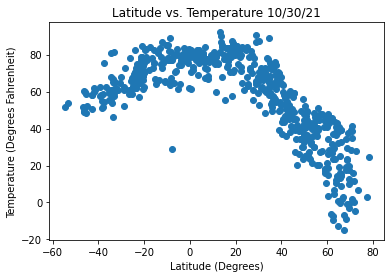

In [54]:
#Establish Latitude as x value to be used in all charts
latitude = weather['Latitude']

#Establish y values
temp = weather['Temperature']

#Establish Scatter Plot
plt.scatter(latitude, temp)

#Chart Formating 
plt.title("Latitude vs. Temperature 10/30/21")
plt.ylabel("Temperature (Degrees Fahrenheit)")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Latitude vs. Temperature Plot.png")

## Latitude vs. Humidity Plot
Analyzes relationship between Humidity and latitude. Does not appear to be a relationship between the variables due to the variability and spread of the plots.

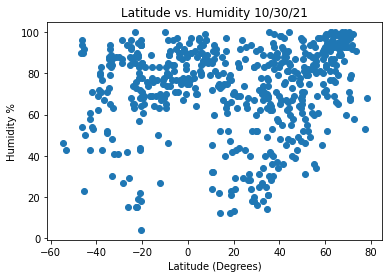

In [42]:
#Establish y values
humidity = weather['Humidity']

#Establish Scatter Plot
plt.scatter(latitude, humidity)

#Chart Formating 
plt.title("Latitude vs. Humidity 10/30/21")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Latitude vs. Humidity Plot.png")

## Latitude vs. Cloudiness Plot
Analyzes relationship between cloudiness and latitude. Does not appear to be a relationship between the variables due to the variability and spread of the plots.

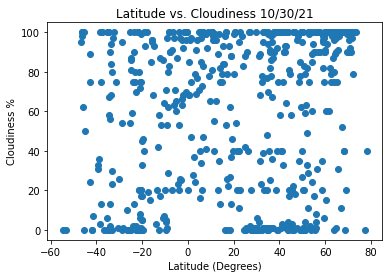

In [43]:
#Establish y values
cloud = weather['Cloudiness']

#Establish Scatter Plot
plt.scatter(latitude, cloud)

#Chart Formating 
plt.title("Latitude vs. Cloudiness 10/30/21")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Latitude vs. Cloudiness Plot.png")

## Latitude vs. Wind Speed Plot
Analyzes relationship between wind speed and latitude. Wind speed has considerable variance, but not enought that a relationship does not exist.

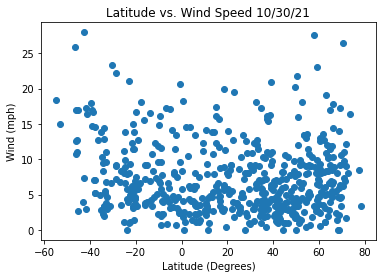

In [44]:
#Establish y values
wind = weather['Wind']

#Establish Scatter Plot
plt.scatter(latitude, wind)

#Chart Formating 
plt.title("Latitude vs. Wind Speed 10/30/21")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Latitude vs. Wind Speed Plot.png")

## Linear Regression

In [45]:
#Seperate data into a data frame for Northern and Southern Hemispheres
northern_data = weather.loc[weather["Latitude"] >= 0]
southern_data = weather.loc[weather["Latitude"] <= 0]

#Establish X value as Latitude for Northern Hemisphere
nh_latitude = northern_data['Latitude']

#Establish X value as Latitude for Southern Hemisphere
sh_latitude = southern_data['Latitude']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
Analyzes Northern Hesmisphere location and Max Temperature. Data is clustered which demonstrates a relationship between latitude and Max Temperature.

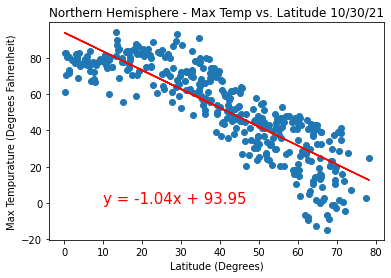

In [46]:
#Establish y values
m_Temp = northern_data['Max Temperature']

#Establish Scatter Plot
plt.scatter(nh_latitude, m_Temp)
(slope, intercept, rvalue, pvalue, std_err) = linregress(nh_latitude, m_Temp)
regress_values = nh_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show Regression line and equation
plt.plot(nh_latitude ,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")

#Chart Formating 
plt.title("Northern Hemisphere - Max Temp vs. Latitude 10/30/21")
plt.ylabel("Max Tempurature (Degrees Fahrenheit)")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Analyzes Southern Hesmisphere location and Max Temperature. Data is clustered which demonstrates a relationship between latitude and Max Temperature.

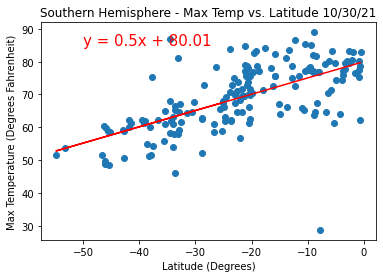

In [47]:
#Establish y values
sm_Temp = southern_data['Max Temperature']

#Establish Scatter Plot
plt.scatter(sh_latitude, sm_Temp)

#Regression Equation 
(slope, intercept, rvalue, pvalue, std_err) = linregress(sh_latitude, sm_Temp)
regress_values = sh_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show Regression line and equation
plt.plot(sh_latitude, regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")

#Chart Formating 
plt.title("Southern Hemisphere - Max Temp vs. Latitude 10/30/21")
plt.ylabel("Max Temperature (Degrees Fahrenheit)")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Analyzes Northern Hesmisphere location and Humidity. Does not appear to be a relationship between the variables due to the variability and spread of the plots.

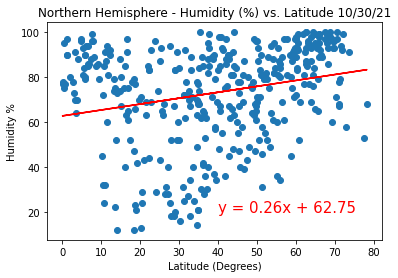

In [48]:
#Establish y values
humidity = northern_data['Humidity']

#Establish Scatter Plot
plt.scatter(nh_latitude, humidity)

#Regression Equation 
(slope, intercept, rvalue, pvalue, std_err) = linregress(nh_latitude, humidity)
regress_values = nh_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show Regression line and equation
plt.plot(nh_latitude ,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

#Chart Formating 
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude 10/30/21")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Analyzes Southern Hesmisphere location and Humidity. Does not appear to be a relationship between the variables due to the variability and spread of the plots.

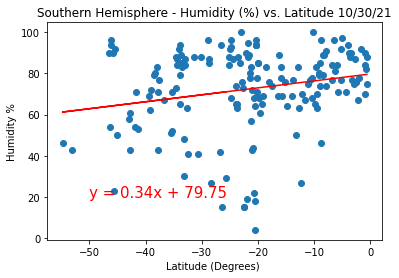

In [49]:
#Establish y values
humidity = southern_data['Humidity']

#Establish Scatter Plot
plt.scatter(sh_latitude, humidity)

#Regression Equation 
(slope, intercept, rvalue, pvalue, std_err) = linregress(sh_latitude, humidity)
regress_values = sh_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show Regression line and equation
plt.plot(sh_latitude ,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

#Chart Formating 
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude 10/30/21")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (Degrees) ")

#Save Plot as PNG
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
Analyzes Northern Hesmisphere location and cloudiness.
Does not appear to be a relationship between the variables due to the variability and spread of the plots

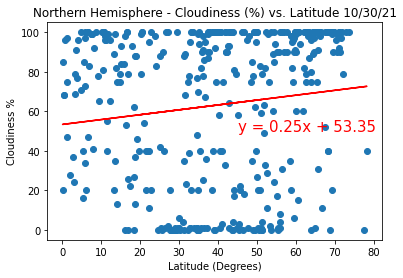

In [50]:
#Establish y values
Cloud = northern_data['Cloudiness']

#Establish Scatter Plot
plt.scatter(nh_latitude, Cloud)

#Regression Equation 
(slope, intercept, rvalue, pvalue, std_err) = linregress(nh_latitude, Cloud)
regress_values = nh_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show Regression line and equation
plt.plot(nh_latitude ,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")

#Chart Formating 
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude 10/30/21")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
Analyzes Southern Hesmisphere location and cloudiness.
Does not appear to be a relationship between the variables due to the variability and spread of the plots.

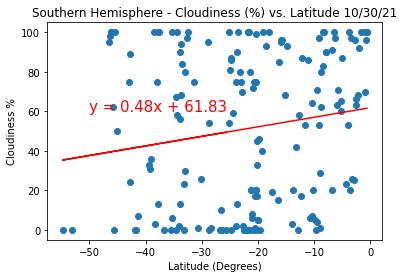

In [51]:
#Establish y values
Cloud = southern_data['Cloudiness']

#Establish Scatter Plot
plt.scatter(sh_latitude, Cloud)

#Regression Equation 
(slope, intercept, rvalue, pvalue, std_err) = linregress(sh_latitude, Cloud)
regress_values = sh_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show Regression line and equation
plt.plot(sh_latitude ,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

#Chart Formating 
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude 10/30/21")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Slight increase in wind speed as the latitude moves away from equator.
Wind speed has considerable variance, but not enought that a relationship does not exist.

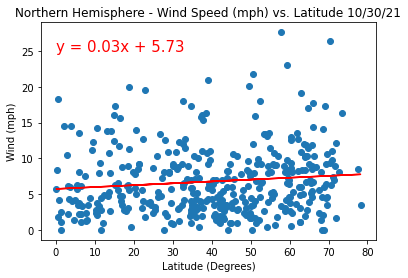

In [52]:
#Establish y values
wind = northern_data['Wind']

#Establish Scatter Plot
plt.scatter(nh_latitude, wind)

#Regression Equation 
(slope, intercept, rvalue, pvalue, std_err) = linregress(nh_latitude, wind)
regress_values = nh_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show Regression line and equation
plt.plot(nh_latitude, regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")

#Chart Formating 
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude 10/30/21")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Slight increase in wind speed as the latitude moves away from equator.
Wind speed has considerable variance, but not enought that a relationship does not exist.

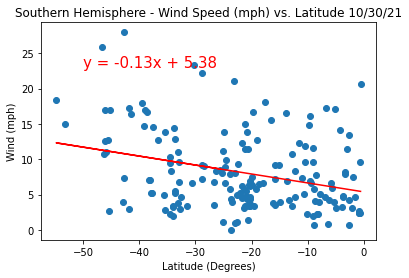

In [53]:
#Establish y values
wind = southern_data['Wind']

#Establish Scatter Plot
plt.scatter(sh_latitude, wind)

#Regression Equation 
(slope, intercept, rvalue, pvalue, std_err) = linregress(sh_latitude, wind)
regress_values = sh_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show Regression line and equation
plt.plot(sh_latitude ,regress_values,"r-")
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")

#Chart Formating 
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude 10/30/21")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude (Degrees)")

#Save Plot as PNG
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")